In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:16:8

env: CUBLAS_WORKSPACE_CONFIG=:16:8


In [2]:
from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA
raw_bulk = EXAMPLE_MULTI_BULK
raw_sc = EXAMPLE_MULTI_SC

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
EXAMPLE_PROCESSED_DATA.train.metadata

,cluster,age,size,density,category,random_feature,sample_id
0,0,21.194224,4.538300,0.113699,A,-0.657083,sample_303
1,0,23.930016,6.864434,0.086318,A,1.280058,sample_259
2,3,53.074559,12.812042,1.111816,D,-0.046288,sample_717
3,4,53.380117,12.875572,0.525779,C,0.578705,sample_127
4,0,33.724569,2.429471,0.038608,B,0.657419,sample_576
...,...,...,...,...,...,...,...
694,0,28.165998,6.223125,0.286763,E,0.047880,sample_578
695,1,31.830988,4.929979,0.456122,B,0.126054,sample_946
696,2,40.607502,6.923138,2.313312,B,-0.288755,sample_284
697,0,40.449944,0.831899,0.096780,C,1.070726,sample_462


In [4]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

preprocessing
Epoch 1 - Train Loss: 839885.2949
Sub-losses: recon_loss: 839885.2949
Epoch 1 - Valid Loss: 114231.5969
Sub-losses: recon_loss: 114231.5969
Epoch 2 - Train Loss: 773314.3262
Sub-losses: recon_loss: 773314.3262
Epoch 2 - Valid Loss: 103066.4958
Sub-losses: recon_loss: 103066.4958
Epoch 3 - Train Loss: 698920.3320
Sub-losses: recon_loss: 698920.3320
Epoch 3 - Valid Loss: 90954.9543
Sub-losses: recon_loss: 90954.9543
Epoch 4 - Train Loss: 624216.1953
Sub-losses: recon_loss: 624216.1953
Epoch 4 - Valid Loss: 81194.9800
Sub-losses: recon_loss: 81194.9800
Epoch 5 - Train Loss: 567257.1777
Sub-losses: recon_loss: 567257.1777
Epoch 5 - Valid Loss: 73372.3618
Sub-losses: recon_loss: 73372.3618
Epoch 6 - Train Loss: 519989.3457
Sub-losses: recon_loss: 519989.3457
Epoch 6 - Valid Loss: 67886.6567
Sub-losses: recon_loss: 67886.6567
Epoch 7 - Train Loss: 495178.3262
Sub-losses: recon_loss: 495178.3262
Epoch 7 - Valid Loss: 61098.3525
Sub-losses: recon_loss: 61098.3525
Epoch 8 - Train 

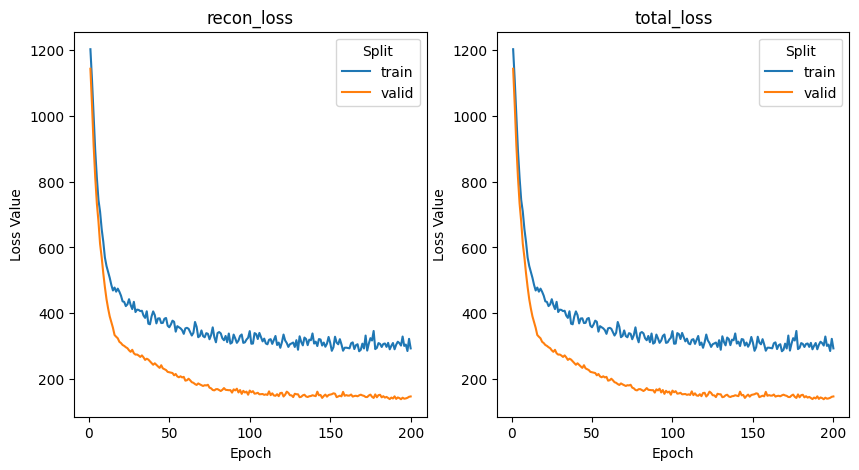

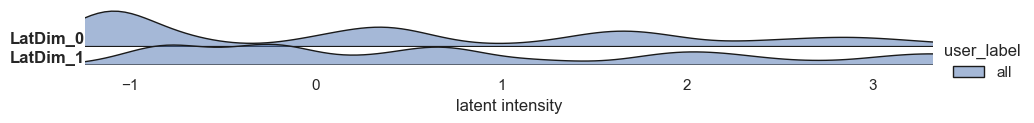

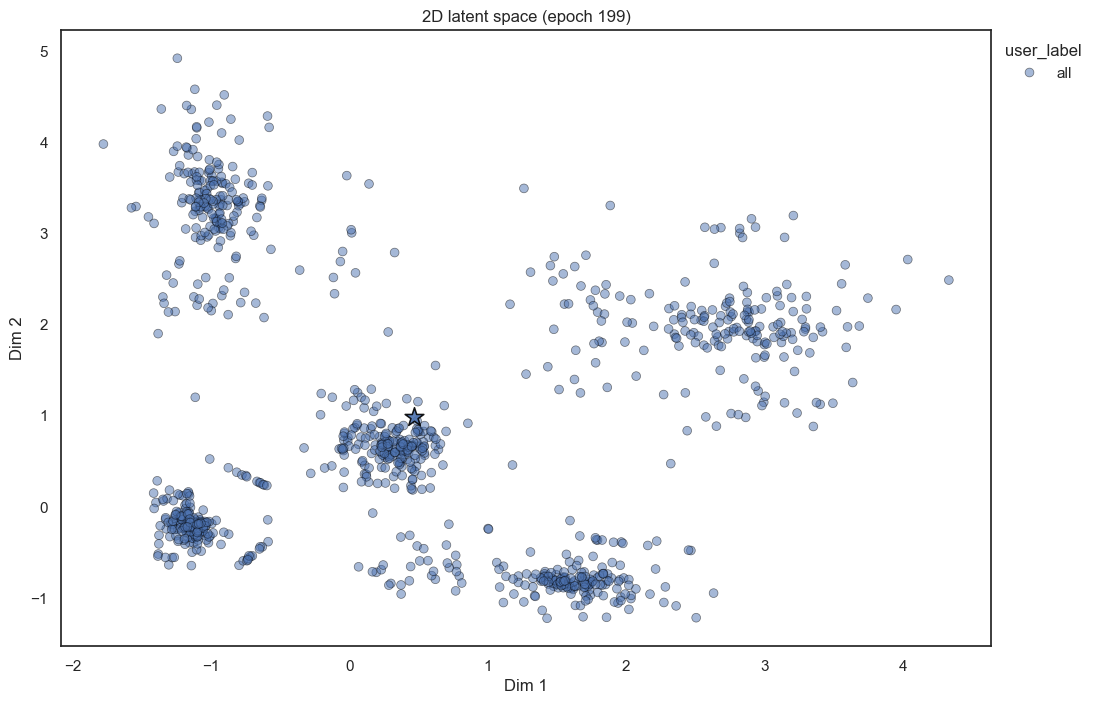

In [5]:
vanillix = acx.Vanillix(config=DefaultConfig(epochs=200, learning_rate=0.005,n_layers=1, latent_dim=2, checkpoint_interval=50), data=processed_data)
vanillix.run()
vanillix.show_result()

In [6]:
categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
categorical_clusters

['Cluster_0',
 'Cluster_0',
 'Cluster_3',
 'Cluster_4',
 'Cluster_0',
 'Cluster_4',
 'Cluster_4',
 'Cluster_2',
 'Cluster_2',
 'Cluster_3',
 'Cluster_0',
 'Cluster_1',
 'Cluster_4',
 'Cluster_3',
 'Cluster_3',
 'Cluster_1',
 'Cluster_3',
 'Cluster_0',
 'Cluster_0',
 'Cluster_3',
 'Cluster_3',
 'Cluster_0',
 'Cluster_1',
 'Cluster_4',
 'Cluster_0',
 'Cluster_1',
 'Cluster_0',
 'Cluster_3',
 'Cluster_4',
 'Cluster_3',
 'Cluster_1',
 'Cluster_2',
 'Cluster_2',
 'Cluster_2',
 'Cluster_1',
 'Cluster_0',
 'Cluster_4',
 'Cluster_0',
 'Cluster_2',
 'Cluster_1',
 'Cluster_3',
 'Cluster_3',
 'Cluster_4',
 'Cluster_2',
 'Cluster_2',
 'Cluster_4',
 'Cluster_3',
 'Cluster_4',
 'Cluster_4',
 'Cluster_2',
 'Cluster_4',
 'Cluster_1',
 'Cluster_0',
 'Cluster_3',
 'Cluster_2',
 'Cluster_0',
 'Cluster_2',
 'Cluster_4',
 'Cluster_0',
 'Cluster_0',
 'Cluster_3',
 'Cluster_0',
 'Cluster_1',
 'Cluster_4',
 'Cluster_4',
 'Cluster_3',
 'Cluster_4',
 'Cluster_1',
 'Cluster_1',
 'Cluster_1',
 'Cluster_1',
 'Clus

In [9]:
vanillix._visualizer.show_latent_space(result=vanillix.result,plot_type="2D-scatter", split="train", label_list=categorical_clusters, param=["Cluster"])
## Problem: during training sample order is shuffled due to batching. Order cannot be recovered with current result object.

TypeError: 'NoneType' object is not subscriptable

In [ ]:
vanillix.result.model

## Ontix

In [10]:
import autoencodix as acx
from autoencodix.utils.default_config import DefaultConfig

from autoencodix.utils.example_data import (
    EXAMPLE_MULTI_BULK,
    EXAMPLE_MULTI_SC,
    EXAMPLE_PROCESSED_DATA,
)

# EXAMPLE_DATA hold PyTorch Datasets (child with extra info) with metdata for train, test and valid splits
processed_data = EXAMPLE_PROCESSED_DATA


In [11]:

ont_lvl1 = dict()
ont_lvl2 = dict()

ont_lvl1["pwy-1"] = ["sub-pwy-1", "sub-pwy-2"]
ont_lvl1["pwy-2"] = ["sub-pwy-2"]
ont_lvl1["pwy-3"] = ["sub-pwy-1", "sub-pwy-3"]
# first third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-1"] = processed_data.train.feature_ids[: int(len(processed_data.train.feature_ids) / 3)]
# second third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-2"] = processed_data.train.feature_ids[
	int(len(processed_data.train.feature_ids) / 3) : int(2 * len(processed_data.train.feature_ids) / 3)
]
# last third of feature ids in processed_data.train.feature_ids
ont_lvl2["sub-pwy-3"] = processed_data.train.feature_ids[
	int(2 * len(processed_data.train.feature_ids) / 3) : int(len(processed_data.train.feature_ids))
]

# ont_lvl2["sub-pwy-1"] = ["gene-1", "gene-2"]
# ont_lvl2["sub-pwy-2"] = ["gene-3", "gene-4"]
# ont_lvl2["sub-pwy-3"] = ["gene-2", "gene-6"]

ontology_tuple = ( ont_lvl1, ont_lvl2 )


In [12]:
# Write each dictionary in ontology_tuple to a separate text file
for i, ont_dict in enumerate(ontology_tuple):
	file_name = f"ontology_level_{i+1}.txt"
	with open(file_name, "w") as f:
		for key, values in ont_dict.items():
			for value in values:
				f.write(f"{value}\t{key}\n")
print("Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt")

Ontology dictionaries written to ontology_level_1.txt and ontology_level_2.txt


In [13]:
ont_files = ["ontology_level_1.txt", "ontology_level_2.txt"]

In [14]:
ontix = acx.Ontix(ontologies=ont_files, sep="\t", config=DefaultConfig(epochs=5, learning_rate=0.005,n_layers=1), data=processed_data)
# ontix = acx.Ontix(ontologies=ontology_tuple, config=DefaultConfig(epochs=500, learning_rate=0.005,n_layers=1), user_data=processed_data)

In [15]:
ontix.run()

preprocessing
Ontix checks:
All possible feature names length: 30
Feature order length: 30
Feature names without filtering: 30
Mask layer 0 with shape torch.Size([3, 3]) and 5.0 connections
Mask layer 1 with shape torch.Size([30, 3]) and 30.0 connections
Latent Dim: 3
Epoch 1 - Train Loss: 856857.5566
Sub-losses: recon_loss: 856857.5547, var_loss: 479.9056, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 120080.4978
Sub-losses: recon_loss: 120080.4858, var_loss: 195.1957, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 823460.7324
Sub-losses: recon_loss: 823456.0801, var_loss: 1880.3157, anneal_factor: 0.0025, effective_beta_factor: 0.0025
Epoch 2 - Valid Loss: 110156.0002
Sub-losses: recon_loss: 110154.4895, var_loss: 612.6536, anneal_factor: 0.0025, effective_beta_factor: 0.0025
Epoch 3 - Train Loss: 732929.4746
Sub-losses: recon_loss: 732210.2617, var_loss: 6033.4846, anneal_factor: 0.1192, effective_beta_factor: 0.1192
Epoch 3 -

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: OntixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._numeric_dataset.NumericDataset object at 0x333daed70>, valid=<autoencodix.data._numeric_dataset.NumericDataset object at 0x333daeda0>, test=<autoencodix.data._numeric_dataset.NumericDataset object at 0x333ef49a0>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 201 × 3
    uns: 'var_names'
final_reconstruction: <au

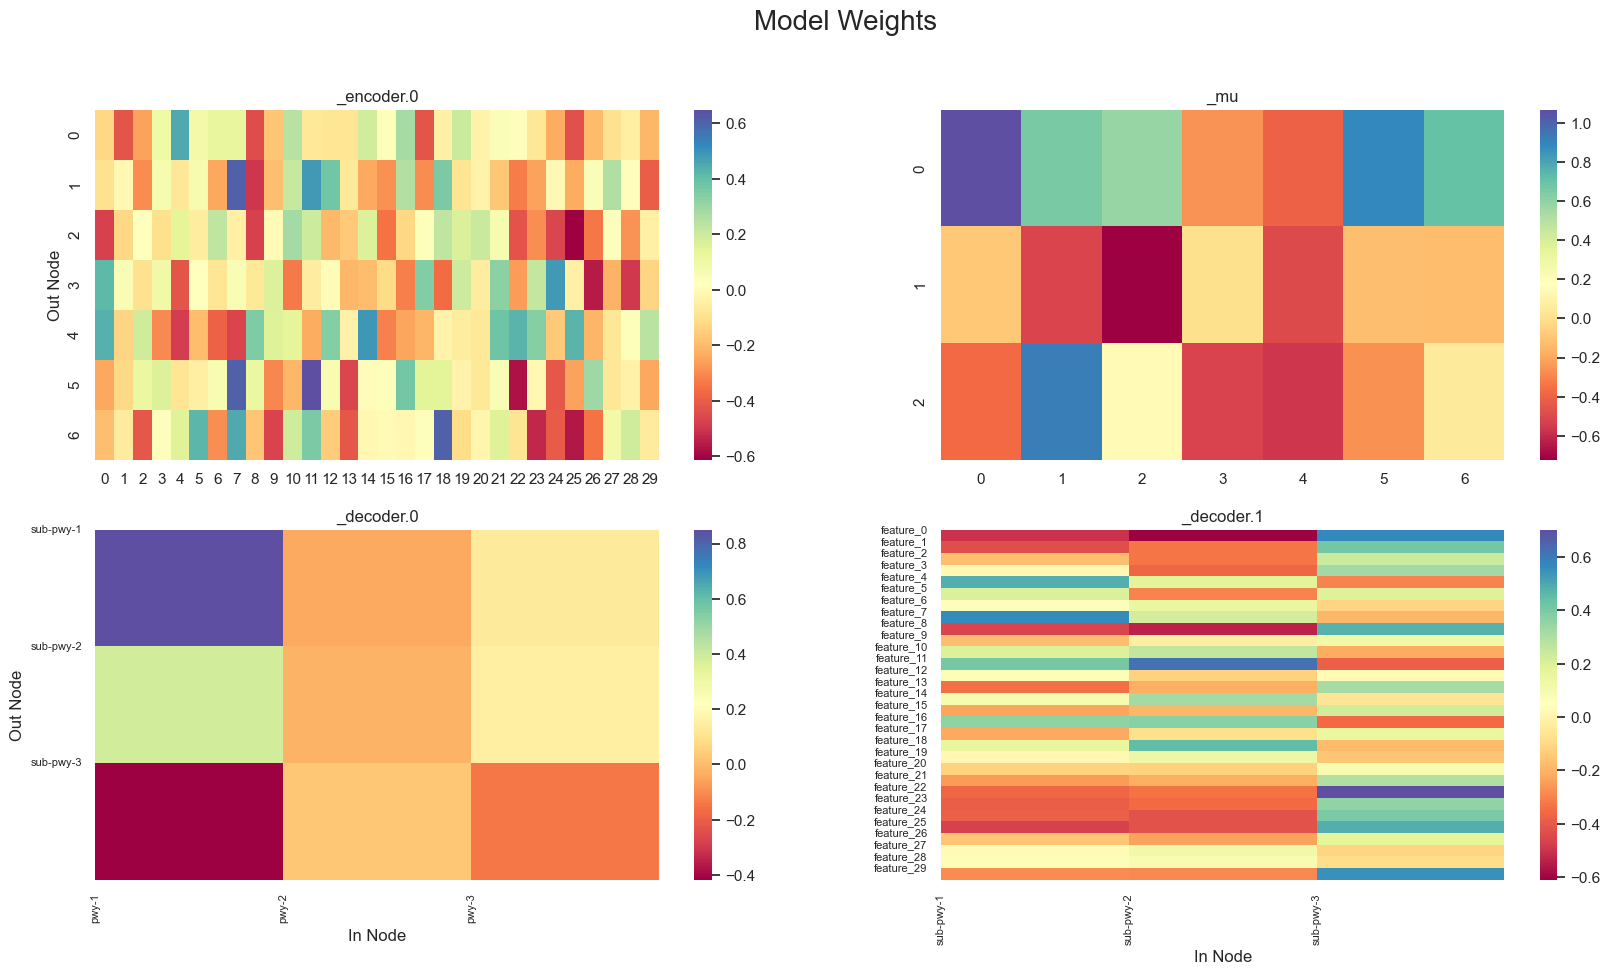

In [16]:
ontix._visualizer.show_weights()

Creating plots ...


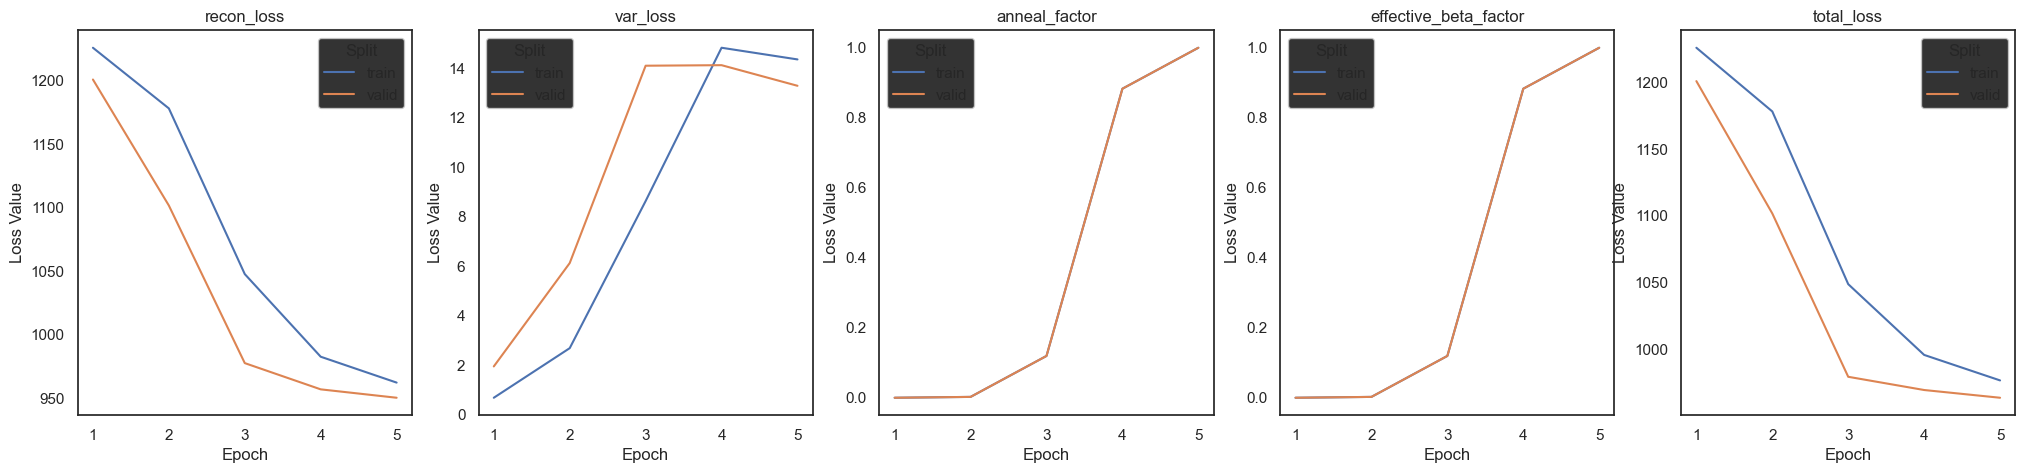

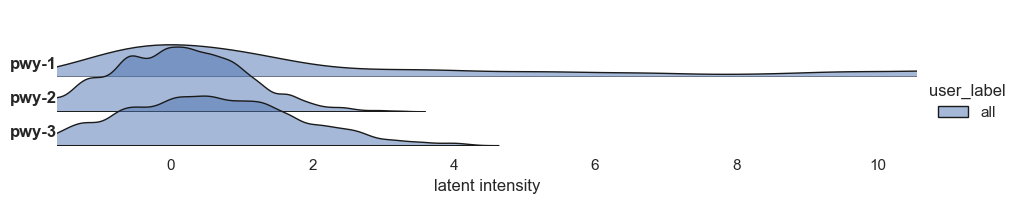

/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


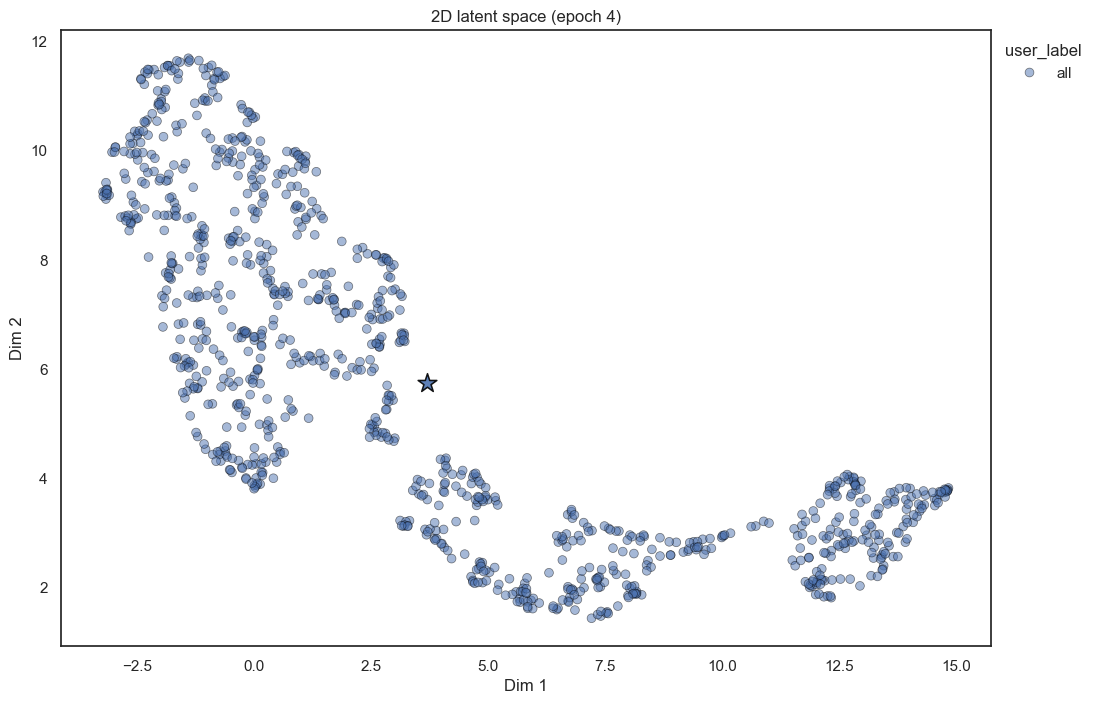

In [17]:
ontix.show_result()

In [18]:
categorical_clusters = ["Cluster_"+str(c) for c in EXAMPLE_PROCESSED_DATA.train.metadata.cluster]
categorical_clusters
ontix._visualizer.show_latent_space(result=ontix.result,plot_type="2D-scatter", split="train", label_list=categorical_clusters, param="Cluster")

ValueError: Please provide parameter to plot as a list not as string. If you want to plot all parameters, set param to 'all' and labels to None.

In [ ]:
ontix.ontologies

In [ ]:
enumerate(ontix.result.model.ontologies)

In [ ]:
ontix.result.model.ontologies[1].keys()

In [ ]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

masks = ontix.result.model.masks

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, mask in enumerate(masks):
	sns.heatmap(np.array(mask), ax=axes[i], cmap="viridis")
	axes[i].set_title(f"Mask {i+1}")
plt.tight_layout()
plt.show()

In [ ]:
ontix.preprocessed_data.train.feature_ids

In [ ]:
# Print all available attributes of ontix
print("Attributes of ontix:")
for attr in dir(ontix):
	if not attr.startswith("__"):
		print(attr)


In [ ]:
import seaborn as sns
import pandas as pd
import umap
import matplotlib.pyplot as plt


# Fit UMAP to reduce to 2D
umap_2d_seaborn = umap.UMAP(n_components=2, random_state=42)
embedding_seaborn = umap_2d_seaborn.fit_transform(EXAMPLE_PROCESSED_DATA.train.data)

# Create a DataFrame for plotting
umap_df = pd.DataFrame({
	"UMAP1": embedding_seaborn[:, 0],
	"UMAP2": embedding_seaborn[:, 1],
	"Cluster": categorical_clusters
})

plt.figure(figsize=(8, 6))
sns.scatterplot(
	data=umap_df,
	x="UMAP1",
	y="UMAP2",
	hue="Cluster",
	palette="tab10",
	s=20,
	alpha=0.7
)
plt.title("2D UMAP projection of train data (colored by cluster_labels)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()